In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached h5py-3.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.3 MB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Using cached wrapt-1.16.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (80 kB)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl (24.5 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_io_gcs_filesystem-0.36.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.1 MB)
  Using c

In [20]:
import tensorflow as tf
print(tf.__version__)

2.16.1


# importing required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')


2024-04-24 20:04:04.799293: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 20:04:05.029113: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 20:04:06.117633: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 20:04:07.787316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data_train_path = 'datasets/train_data'
data_test_path = 'datasets/test_data/'
data_validation_path = 'datasets/validation_data'

In [ ]:
# setting our images to similar sizes.

In [4]:
image_width = 180
image_height =180 

* we have to bring the dataset in the form of arrays because model cannot accept the data from folder.
* we can do this using the function of tensorflow. i.e load_from_the_disk
* It will take the data from the disk and load it into the form of array.

# importing datasets

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle= True,  # shuffle dataset
    image_size = (image_width,image_height),
    batch_size=20,
    validation_split= False )

Found 120 files belonging to 4 classes.


In [9]:
data_category= data_train.class_names  
data_category

['cat', 'dog', 'elephant', 'tiger']

In [10]:
data_validation = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    image_size=(image_height,image_width),
    batch_size=20,
    shuffle = False,
    validation_split=False
)

Found 20 files belonging to 4 classes.


In [11]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(image_height,image_width),
    batch_size = 20,
    shuffle = False,
    validation_split=False
    )

Found 68 files belonging to 4 classes.



* now we have data set in arrays i.e we have data_train,data_validation,data_test.
* now lets print some images from the training datasets.



2024-04-24 21:23:05.153828: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28311552 exceeds 10% of free system memory.
2024-04-24 21:23:05.305950: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31809600 exceeds 10% of free system memory.
2024-04-24 21:23:05.491608: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25348707 exceeds 10% of free system memory.
2024-04-24 21:23:06.290071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


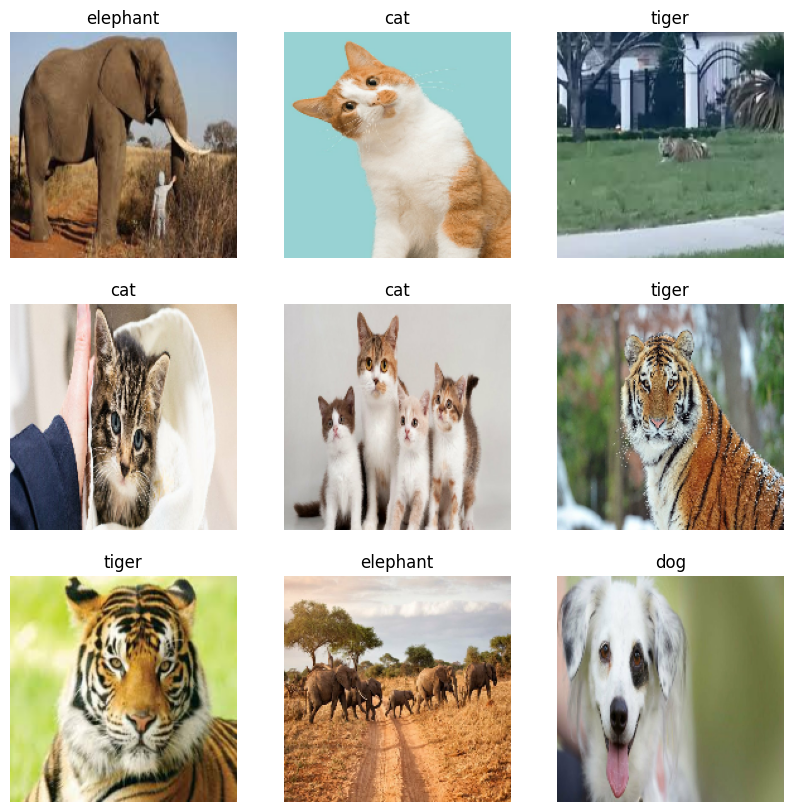

In [12]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):# take is the numpy function that returns the array value.
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

* 180 is the pixel of the height and width. 3 is RGB. So what conv2D will do is it will convert 180 into single pixel and 3 will be converted to combination of those 3(RGB).
* conv2d is input and stores output in maxpooling2d. this is one layer.



In [15]:
model = Sequential([
    layers.Rescaling(1./255), #divide each color with 255(max value) i.e rescaling every color in between 0 and 1
    layers.Conv2D(16,3,padding='same',activation='relu'), #it will convert into 1D array, 16 is neuron
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),#32 neuron
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),#64 neuron
    layers.MaxPool2D(),
    layers.Flatten(), # flattening the layers.
    layers.Dropout(0.2), # it makes sure that model will not overfit
    layers.Dense(128), # dense with 128 layers
    layers.Dense(len(data_category)) # i.e 36 different category are there. Data will be classified into 36 category
    
])

# now we have to do the compiling of the model.
* we have to pass 3 parameter while compiling i.e optimizer,loss,metrics

In [16]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [17]:
epochs_size = 10
history = model.fit(data_train,validation_data=data_validation,epochs=epochs_size)

Epoch 1/10


2024-04-24 21:34:16.882207: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28311552 exceeds 10% of free system memory.
2024-04-24 21:34:16.973464: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31809600 exceeds 10% of free system memory.


6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2987 - loss: 3.7306 - val_accuracy: 0.2500 - val_loss: 1.9758
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step - accuracy: 0.2444 - loss: 1.7446 - val_accuracy: 0.3500 - val_loss: 1.3136
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step - accuracy: 0.5146 - loss: 1.2083 - val_accuracy: 0.5500 - val_loss: 1.1595
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 410ms/step - accuracy: 0.5533 - loss: 1.0928 - val_accuracy: 0.6500 - val_loss: 0.9676
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 365ms/step - accuracy: 0.6858 - loss: 0.8813 - val_accuracy: 0.7000 - val_loss: 0.9325
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step - accuracy: 0.8107 - loss: 0.6653 - val_accuracy: 0.7500 - val_loss: 0.7883
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 355ms/step - accuracy: 0.8501 - loss: 0.4514 - val_accuracy: 0.6000 - val_loss: 0.8708
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 360ms/step - accuracy: 0.8849 - loss: 0.3076 - val_accuracy: 0.7000 - val_loss: 0.8139
Epoch

# accuracy of validation_dataset vs training data_set visualization

Text(0.5, 1.0, 'Loss')

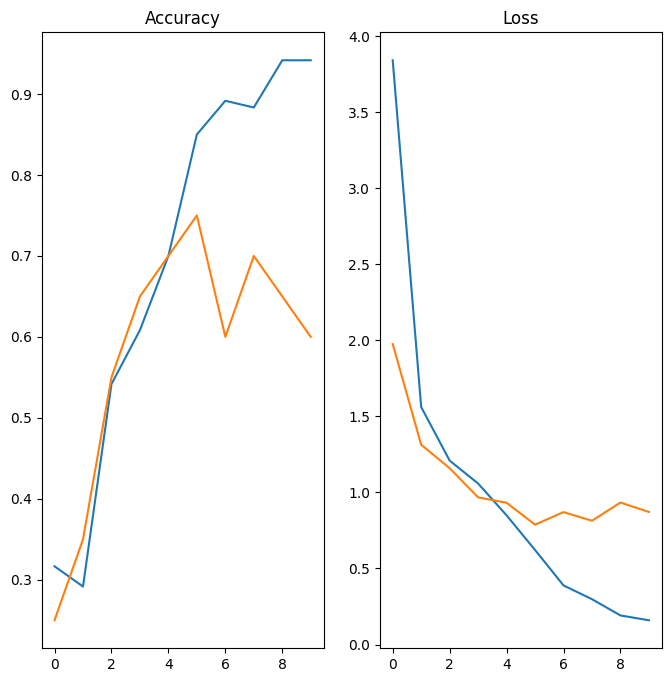

In [18]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

# lets take one sample images and see if our model is working properly or not.

In [36]:
image = 'elephant.jpg'
image = tf.keras.utils.load_img(image, target_size=(image_height,image_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0) # image_batch

In [37]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [38]:
score = tf.nn.softmax(predict)

In [39]:
print('Animal in image is {} with accuracy of {:0.2f}'.format(data_category[np.argmax(score)],np.max(score)*100))

Animal in image is elephant with accuracy of 100.00


# building the web application

In [24]:
model.save('Image_classify.keras')